In [1]:
import os
import numpy as np
from py3helpers.aws import AwsS3
from rrna_analysis.plot_experiment_table import plot_acc_heatmap_for_experiment
from rrna_analysis.multiple_model_accuracy import plot_accuracy_vs_delta_and_accuracy_over_time, preprocess_accuracy_csv
from rrna_analysis.kmer_pos_mapping import KmerPosMapping
import pandas as pd

mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
kpm = KmerPosMapping(reference, positions, mods_csv)
client = AwsS3()


Enter MFA code for arn:aws:iam::652235167018:mfa/andbaile@ucsc.edu: ········


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [3]:
kpm.mod_handler
kpm.mod_handler.sort_values(by=['percent'])[["percent", "reference_index"]]


,percent,reference_index
105,58,2943
9,60,465
11,67,561
57,70,1109
8,73,435
40,74,662
92,75,2728
46,75,875
82,77,2346
45,78,866


In [6]:
model_n = 30
# key="accuracy"
# key="recall"
# key="specificity"
# key="precision"
# key="negative_predictive_value"
# key="recall"
# key="f1_score"
# key="brier_score"
# key="auroc"

max_percent=100
min_percent=0
min_delta=0
max_delta=np.inf

_ivt_and_native="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/ivt_and_native_training/train_500_test_500_prob_0.5_em_iterations_30_all_kmers_ivt_and_native_training"
_30_rounds="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_false_MIN_SD_0"
_native_all_kmers="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/only_covered_kmers_training/train_500_test_500_prob_0.5_em_iterations_30_all_kmers"
_unsup_60="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_60_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_true"
_unsup_70="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_70_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_true"
_unsup_80="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_80_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_true"
_unsup_90="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_90_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_true"
_unsup_90_no_ivt="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_90_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_false"
_unsup_alt_can_90="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_90_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_false"
_alt_can="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false"
_alt_can_80="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.80_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_alt_c_6mer"
# round 5 from alt_c used for continuing training
_unsup_alt_can_80="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.80_em_iterations_30_gaussian_true_FREQ_THRESHOLD_90_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_false_alt_c_6mer"
_median_30 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_true_MIN_SD_0/"
_mrna_trained_30 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/trained_mRNA_model/standard/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_false_unsupervised_false_all_kmers_false"
_alt_can_60 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian_60/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_alt_c_6mer"
_alt_can_all_k = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_true_alt_c_6mer"
_alt_can_pretrain_all_k = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_true_alt_c"
_alt_can_unsupervised_pretrain_30 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian_60/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_90_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_false_alt_c"
# 0.5, 0.6, 0.7, 0.9 prob freq 
_small_09 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/test/train_500_test_500_prob_0.9_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer"
_small_08 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/test/train_500_test_500_prob_0.8_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer"
_small_07 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/test/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer"
_small_06 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/test/train_500_test_500_prob_0.6_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer"
_small_05 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/test/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer"

_median_small_07 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/test/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true"
_small_6mer = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_6mer/test/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_6mer"
# 0.5, 0.6, 0.7, 0.8, 0.9 median 
_median_05_2 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/median/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_2"
_median_06_2 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/median/train_500_test_500_prob_0.6_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_2"
_median_07_2 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/median/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_2"
_median_08_2 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/median/train_500_test_500_prob_0.8_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_2"
_median_09_2 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/median/train_500_test_500_prob_0.9_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_2"
_median_05 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/median/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0"
_median_06 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/median/train_500_test_500_prob_0.6_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0"
_median_07 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/median/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0"
_median_08 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/median/train_500_test_500_prob_0.8_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0"
_median_09 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/median/train_500_test_500_prob_0.9_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0"

# depletion tests
_depletion_07_ivt_and_native_only = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/test_with_depletions/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0"
_depletion_07 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/depletion/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0"



# top_dirs = [_30_rounds, _native_all_kmers, _ivt_and_native]
# top_dirs = [_unsup_60, _unsup_70, _unsup_80, _unsup_90, _unsup_90_no_ivt, _ivt_and_native]
# top_dirs = [_median_30, _30_rounds, _unsup_90_no_ivt, _ivt_and_native, _unsup_90, _alt_can, _unsup_alt_can_90, _unsup_alt_can_80]
# top_dirs = [_30_rounds, _ivt_and_native, _alt_can, _unsup_alt_can, _alt_can_80, _unsup_alt_can_80]
# top_dirs = [_alt_can, _alt_can_80]
# top_dirs = [_alt_can, _unsup_alt_can, _alt_can_80, _unsup_alt_can_80]
# top_dirs = [_alt_can, _median_small_07]
# top_dirs = [_alt_can, _unsup_alt_can_80, _alt_can_unsupervised_pretrain_30]
top_dirs = [_small_05, _small_07, _small_09, _median_small_07, _median_05_2]
top_dirs = [_small_05, _small_06, _small_07, _small_08, _small_09]
# top_dirs = [_median_05_2, _median_06_2, _median_07_2, _median_08_2, _median_09_2]
top_dirs = [_depletion_07_ivt_and_native_only, _depletion_07]
# top_dirs = [_alt_can, _median_07]

# top_dirs = [_30_rounds, _ivt_and_native, _alt_can, _unsup_alt_can]

# top_dirs = [_unsup_90_no_ivt, _30_rounds]
# round_n = [1, 30]
round_n = 30
overwrite=True

Got final_data_frame: len=110
Got plot_df: len=110
Got mod_s3_urls: len=110


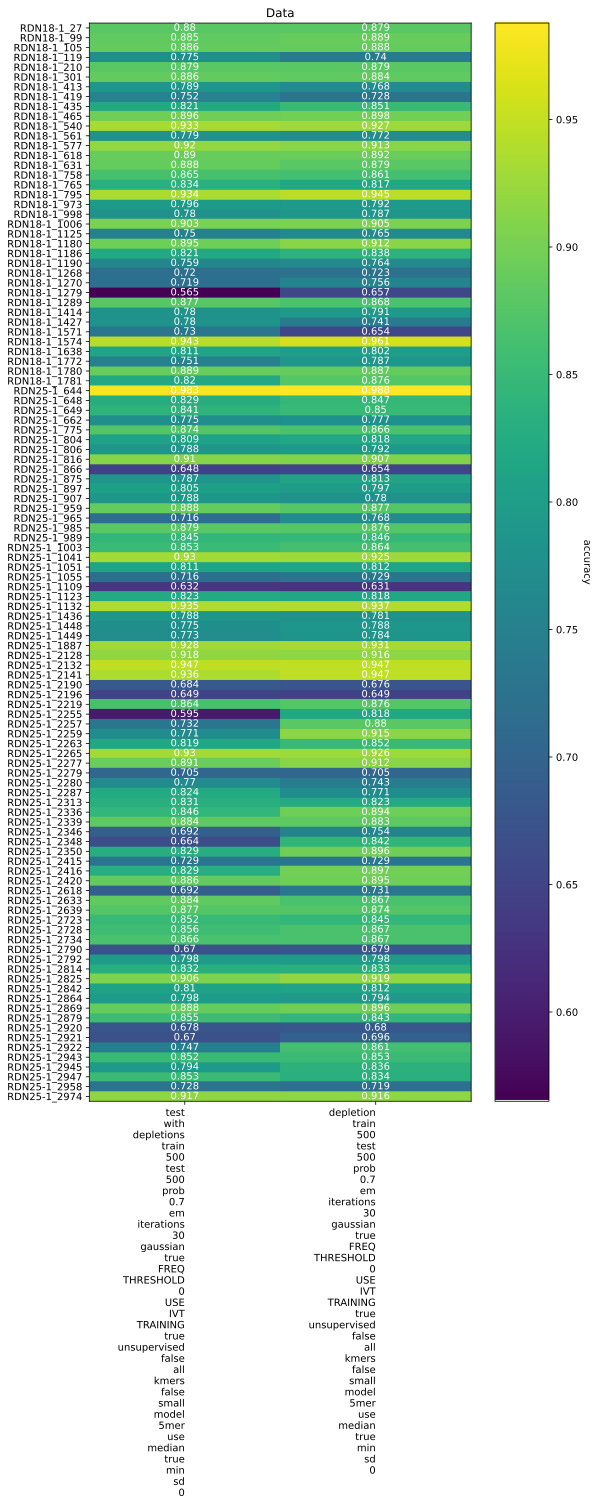

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
plot_acc_heatmap_for_experiment(top_dirs, "accuracy", kpm, max_percent=max_percent, min_percent=min_percent, min_delta=min_delta, max_delta=max_delta, round_n=round_n, show_numbers=True, client=client, overwrite=overwrite)


In [13]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
savefig=None
cmap = "seismic"
recall_frac_max_percent = 90
recall_frac_max_percent = 100
norm = mpl.colors.Normalize(vmin=-1., vmax=.1)
norm = mpl.colors.LogNorm(vmin=-1, vmax=1)
norm = mpl.colors.SymLogNorm(linthresh=0.05, linscale=0.05, vmin=-1.0, vmax=1.0)
# norm = None
# savefig="/Users/andrewbailey/CLionProjects/rrna_analysis/figures/acc_comparison/3way_accuracy_comparison.png"
plot_acc_heatmap_for_experiment(top_dirs, "recall-frac", kpm, norm=norm, cmap=cmap, max_percent=recall_frac_max_percent, min_percent=min_percent, min_delta=min_delta, max_delta=max_delta, round_n=round_n, show_numbers=True, client=client, savefig=savefig, overwrite=overwrite)


/Users/andrewbailey/anaconda3/envs/signalalign/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  # This is added back by InteractiveShellApp.init_path()


AssertionError: top_dir path does not exist:/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/median/train_500_test_500_prob_0.6_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0

Got final_data_frame: len=110
Got plot_df: len=110
Got mod_s3_urls: len=110


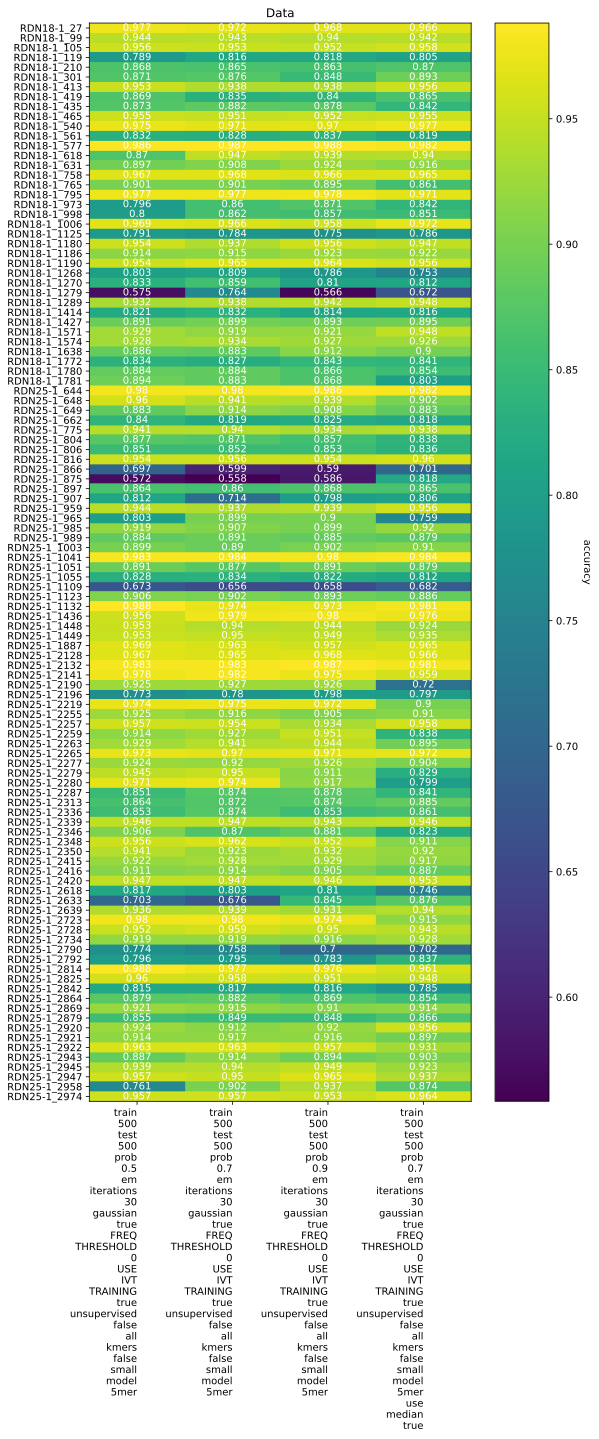

In [11]:
plot_acc_heatmap_for_experiment(top_dirs, "accuracy", kpm, max_percent=max_percent, min_percent=min_percent, min_delta=min_delta, max_delta=max_delta, round_n=round_n, show_numbers=True, client=client, overwrite=overwrite)


Got final_data_frame: len=110
Got plot_df: len=110
Got mod_s3_urls: len=110


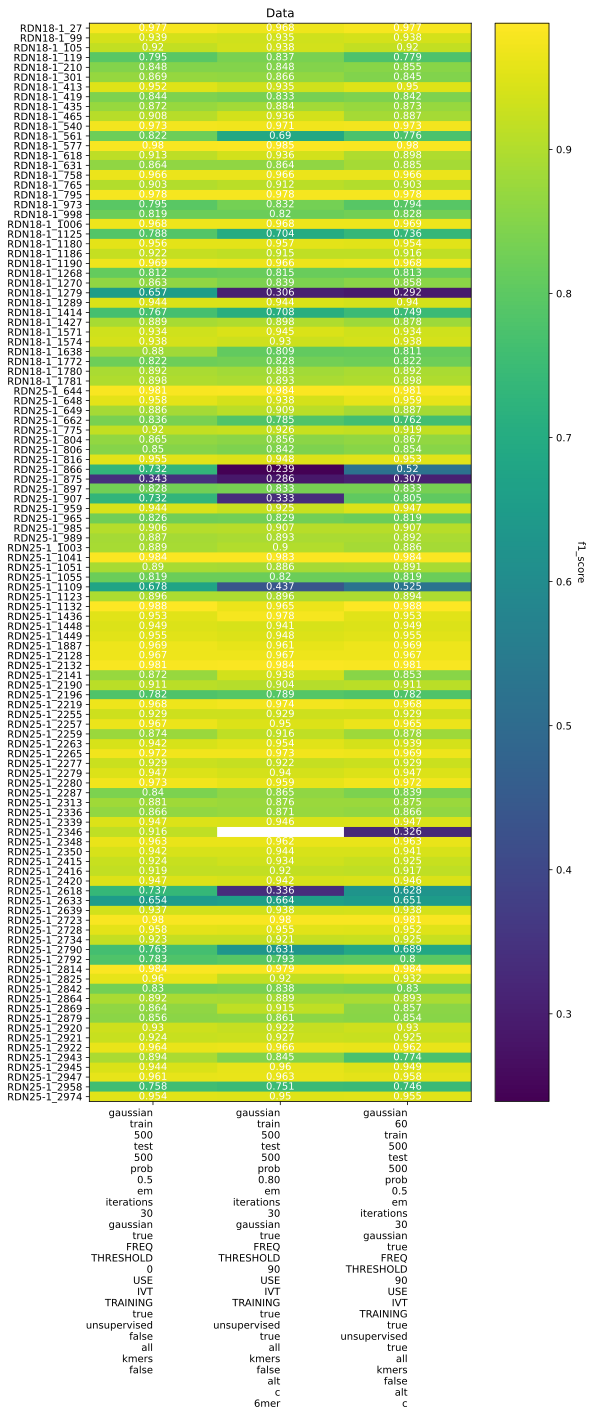

In [15]:
plot_acc_heatmap_for_experiment(top_dirs, "f1_score", kpm, max_percent=max_percent, min_percent=min_percent, min_delta=min_delta, max_delta=max_delta, round_n=round_n, show_numbers=True, client=client, overwrite=overwrite)

Got final_data_frame: len=110
Got plot_df: len=110
Got mod_s3_urls: len=110


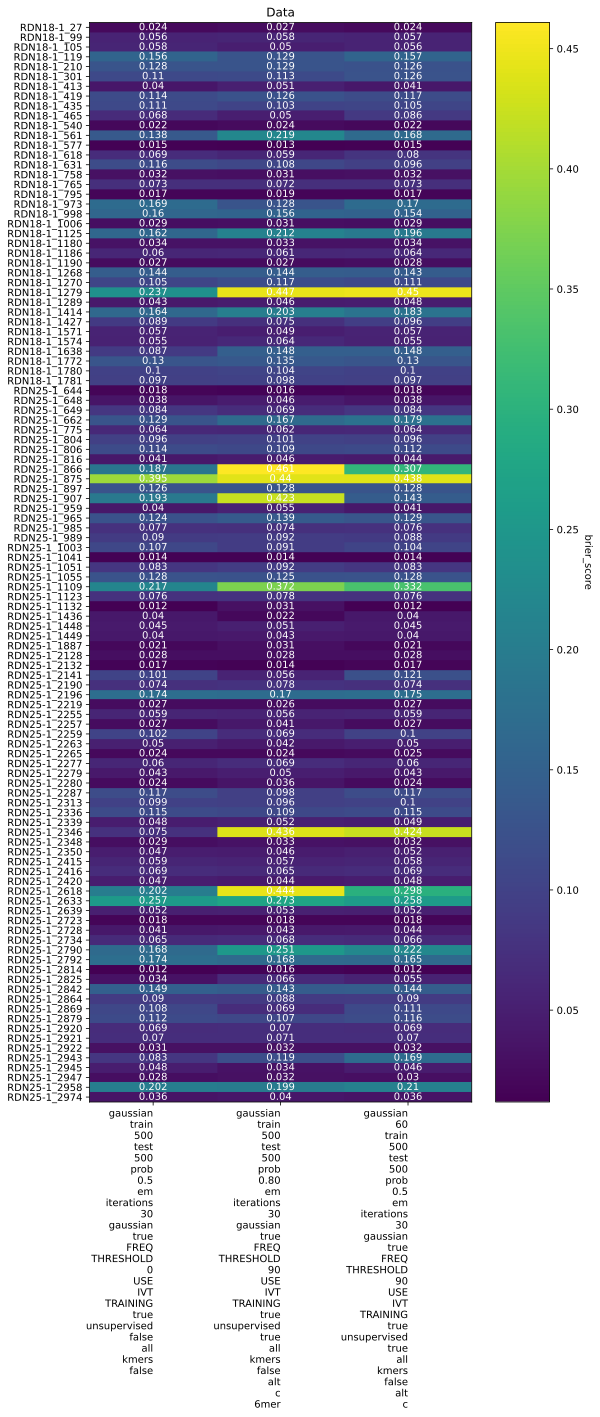

In [16]:
plot_acc_heatmap_for_experiment(top_dirs, "brier_score", kpm, max_percent=max_percent, min_percent=min_percent, min_delta=min_delta, max_delta=max_delta, round_n=round_n, show_numbers=True, client=client, overwrite=overwrite)

Got final_data_frame: len=110
Got plot_df: len=110
Got mod_s3_urls: len=110


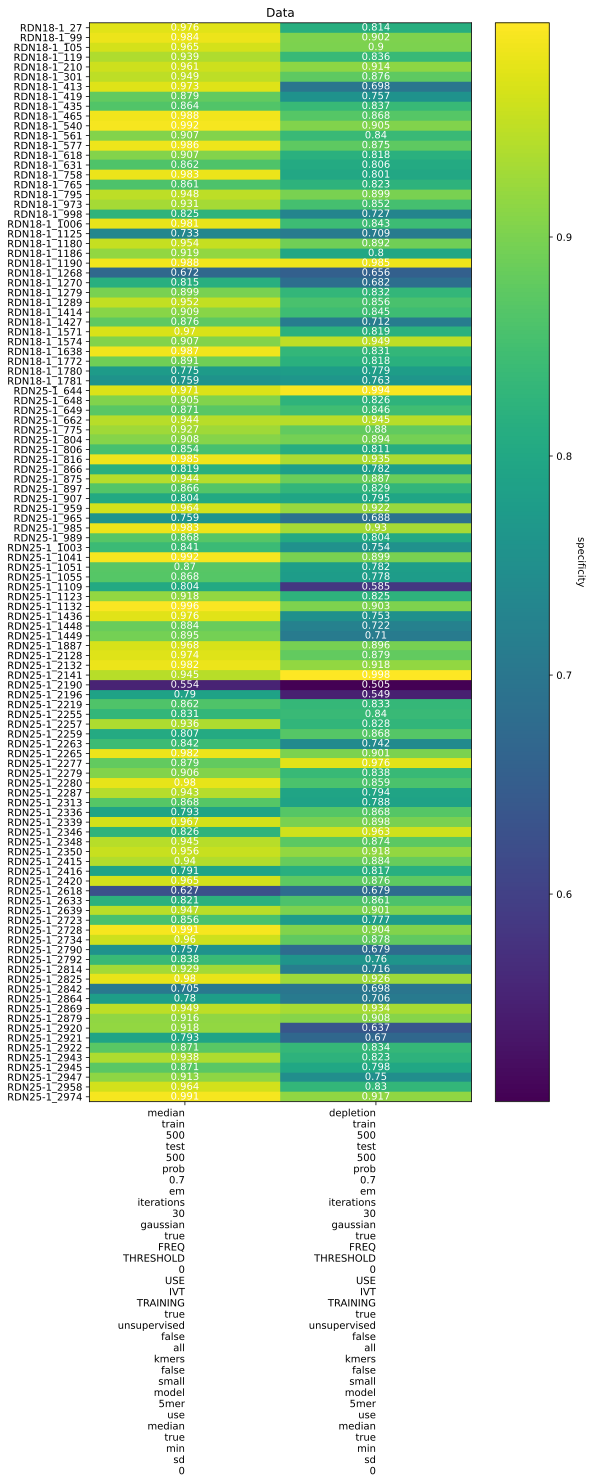

In [6]:
plot_acc_heatmap_for_experiment(top_dirs, "specificity", kpm, max_percent=max_percent, min_percent=min_percent, min_delta=min_delta, max_delta=max_delta, round_n=round_n, show_numbers=True, client=client, overwrite=overwrite)

Got final_data_frame: len=110
Got plot_df: len=110
Got mod_s3_urls: len=110


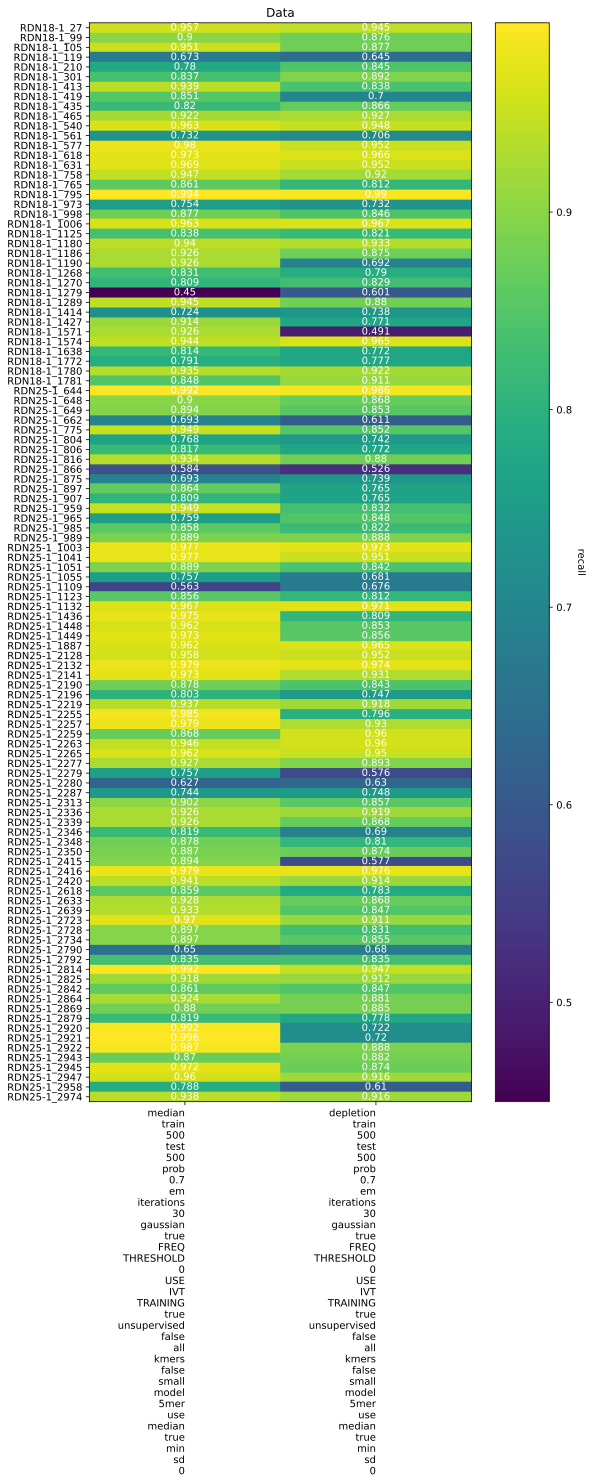

In [7]:
plot_acc_heatmap_for_experiment(top_dirs, "recall", kpm, max_percent=max_percent, min_percent=min_percent, min_delta=min_delta, max_delta=max_delta, round_n=round_n, show_numbers=True, client=client, overwrite=overwrite)

In [ ]:
# key = "accuracy"
# key = "precision"
# key = "negative_predictive_value"
# key = "recall"
# key = "specificity"
# key = "positive_likelihood_ratio"
# key = "negative_likelihood_ratio"
# key = "diagnostic_odds_ratio"
# key = "f1_score"
# key = "prevalence"
# key = "aucroc"
# key = "avg_precision"
# key = "brier_score"



In [ ]:
plot_acc_heatmap_for_experiment(top_dirs, "precision", kpm, max_percent=max_percent, min_percent=min_percent, min_delta=min_delta, max_delta=max_delta, round_n=round_n, show_numbers=True, client=client, overwrite=overwrite)

In [ ]:
plot_acc_heatmap_for_experiment(top_dirs, "negative_predictive_value", kpm, max_percent=max_percent, min_percent=min_percent, min_delta=min_delta, max_delta=max_delta, round_n=round_n, show_numbers=True, client=client, overwrite=overwrite)